In [27]:
from nn import MLP
import pandas as pd

In [28]:
train = pd.read_parquet('mnist/train-00000-of-00001.parquet')


In [29]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def process_image_struct(image):
    raw_bytes = image['image']['bytes']
    image_stream = io.BytesIO(raw_bytes)
    img = Image.open(image_stream).convert('L')
    img_arr = np.array(img)
    return img_arr

train_images = train.apply(process_image_struct,axis=1)

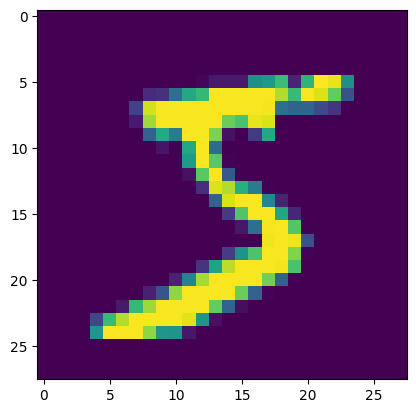

In [30]:
plt.imshow(train_images
           .iloc[0])

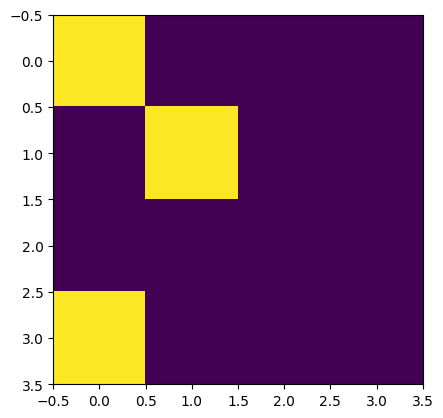

In [31]:
import random

def create_sample(side):
    zeros = np.zeros((4,4))
    max_points = random.randint(3,6)

    for i in range(max_points):
        point_y = random.randint(0,1) if side == "left" else random.randint(2,3)
        point_x = random.randint(0,3) 
        zeros[point_x][point_y] = 1
    return zeros

plt.imshow(create_sample("left"))

In [32]:
xs = []
ys = []
for i in range(200):
    xs.append(create_sample("right"))
    ys.append(1)
    xs.append(create_sample("left"))
    ys.append(0)

In [35]:
from nn import Neuron

n = Neuron(16,bias=False)

it = 0

while True:

    local_losses = []
    
    for i in range(len(xs)):
        x = xs[i].flatten().tolist()
        y = ys[i]

        out = n(x)

        loss = (y - out)**2
        for p in n._params:
            p.grad = 0

        loss.backward()

        for p in n._params:
            p.data -= 0.01 * p.grad

        local_losses.append(loss.data)

    print(np.mean(local_losses))
    it += 1
    if it >300:
        break

    


0.2322181338846567
0.09853916160151314
0.03427424312268484
0.011988870729438786
0.007166433935326763
0.005715322722320683
0.004942354678325301
0.004401150525672854
0.003984890744734121
0.0036510094389957176
0.0033759948176879002
0.003144884797906852
0.0029475106640332598
0.0027766764143499567
0.0026271328845138293
0.0024949546765676103
0.002377143728956383
0.0022713681282416185
0.0021757849858400975
0.002088917301120918
0.0020095664708415714
0.0019367489144217487
0.001869649369894391
0.001807585938281907
0.0017499835525157537
0.00169635358311024
0.0016462779784448443
0.0015993967998382038
0.0015553983287300743
0.0015140111442644994
0.0014749977257814237
0.0014381492466358043
0.0014032813069316517
0.0013702304123067476
0.0013388510500587467
0.0013090132469716536
0.0012806005181983113
0.0012535081356155374
0.0012276416587227864
0.0012029156825090143
0.0011792527655730143
0.0011565825087453937
0.0011348407599674631
0.0011139689255649707
0.0010939133715628954
0.001074624901511464
0.0010560

In [4]:
myapp = print

In [5]:
myapp("Hello")

Hello


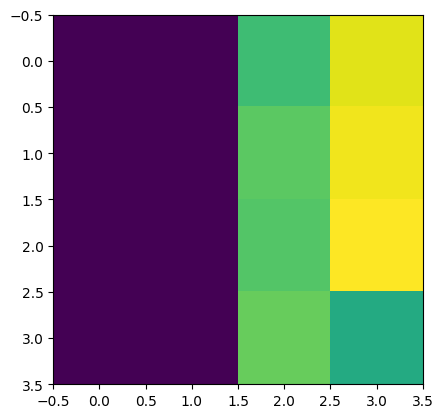

In [36]:
weights =  np.array([ w.data for w in n.w]).reshape((4,4))
plt.imshow(weights)